<a href="https://colab.research.google.com/github/Asmaaad37/Machine-Learning/blob/main/Flipkart_Reviews_Sentiment_Analysis_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/flipkart_reviews.csv")
df.head()

,Product_name,Review,Rating
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5


In [6]:
df["Rating"].value_counts()

,count
Rating,
5,1382
4,552
1,184
3,140
2,46


In [7]:
# Check null or missing values
df.isnull().sum()

,0
Product_name,0
Review,0
Rating,0


We're good to go, as there are no empty observations present in our dataset.

**Now, I will clean and prepare the column containing reviews before heading to sentiment analysis**

In [8]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)

    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
df["Review"].head()

,Review
0,Best under 60k Great performanceI got it for a...
1,Good perfomence...
2,Great performance but usually it has also that...
3,My wife is so happy and best product 👌🏻😘
4,"Light weight laptop with new amazing features,..."


In [11]:
df["Review"] = df["Review"].apply(clean)
df["Review"].head()

,Review
0,best great performancei got around backup bi...
1,good perfom
2,great perform usual also game laptop issu batt...
3,wife happi best product 👌🏻😘
4,light weight laptop new amaz featur batteri li...


**Sentiment Analysis of Flipkart Reviews**

In [12]:
# Ratings by column
ratings = df["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px
fig = px.pie(
    df,
    values = quantity,
    names = numbers, hole=0.5
)

fig.show()

**Now let’s have a look at the kind of reviews people leave. For this, I will use a word cloud to visualize the most used words in the reviews column:**

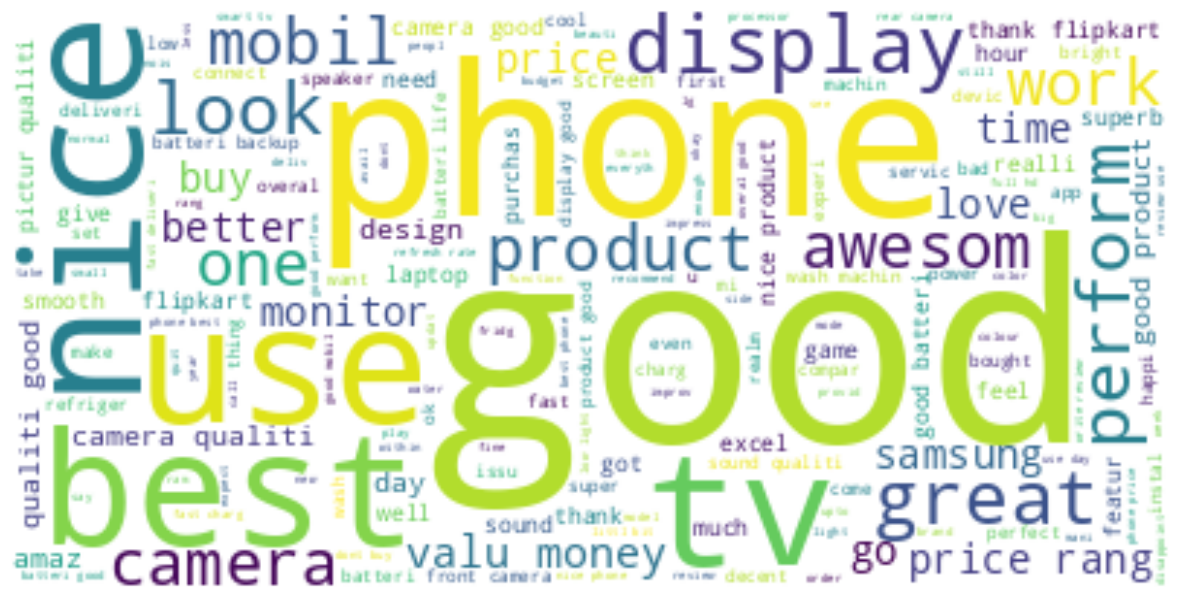

In [13]:
# Most used words in Reviews
text = " ".join(i for i in df.Review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
    stopwords=stopwords,
    background_color="white"
).generate(text)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Now I will analyze the sentiments of Flipkart reviews by adding three columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the reviews:**

In [18]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["Review"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["Review"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["Review"]]

df = df[["Review", "Positive", "Negative", "Neutral"]]
df.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Review,Positive,Negative,Neutral
0,best great performancei got around backup bi...,0.395,0.101,0.504
1,good perfom,0.744,0.000,0.256
2,great perform usual also game laptop issu batt...,0.277,0.000,0.723
3,wife happi best product 👌🏻😘,0.512,0.000,0.488
4,light weight laptop new amaz featur batteri li...,0.000,0.000,1.000


In [17]:
df.head()

,Review,Positive,Negative,Neutral
0,best great performancei got around backup bi...,0.395,0.101,0.504
1,good perfom,0.744,0.000,0.256
2,great perform usual also game laptop issu batt...,0.277,0.000,0.723
3,wife happi best product 👌🏻😘,0.512,0.000,0.488
4,light weight laptop new amaz featur batteri li...,0.000,0.000,1.000


**Now let’s see how most of the reviewers think about the products and services of Flipkart:**

In [20]:
x = sum(df["Positive"])
y = sum(df["Negative"])
z = sum(df["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")

sentiment_score(x, y, z)

Neutral 🙂 


In [21]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  923.5529999999985
Negative:  96.77500000000013
Neutral:  1283.6880000000006


**So, most people give Neutral reviews, and a small proportion of people give Negative reviews. So we can say that people are satisfied with Flipkart products and services.**